# Import Library

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf

# Import Dataset
Source: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [112]:
df = pd.read_excel("Real estate valuation data set.xlsx")
df = df.drop(["No"], axis=1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# Plot vs. Response Variable

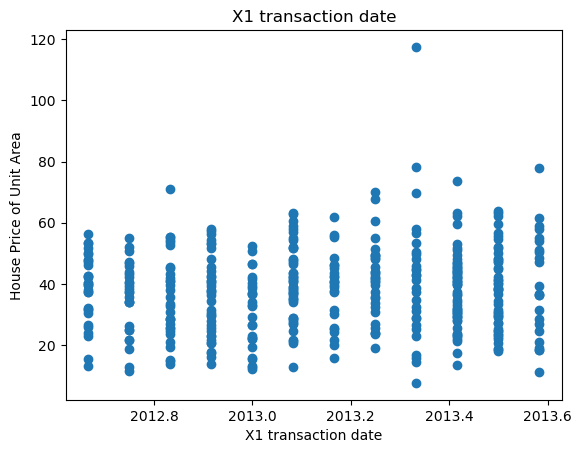

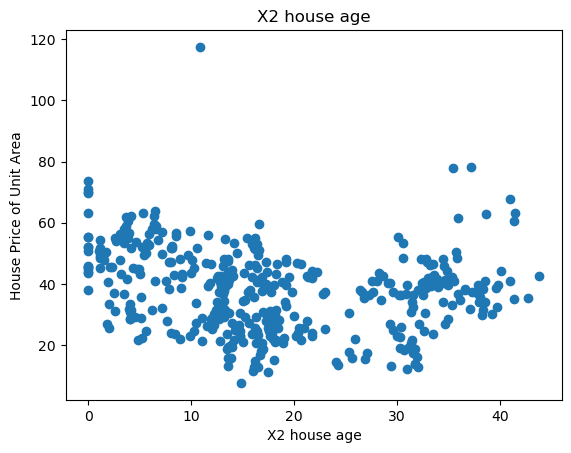

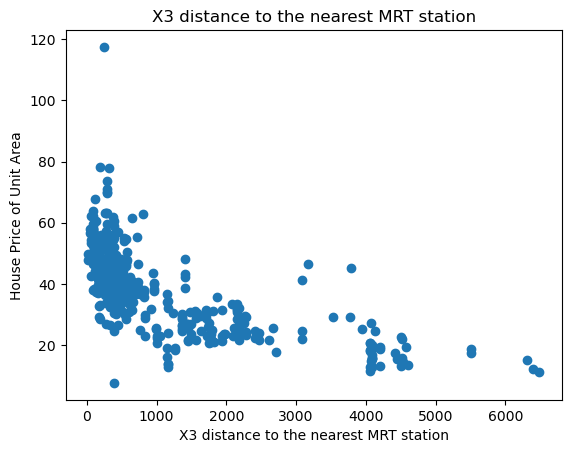

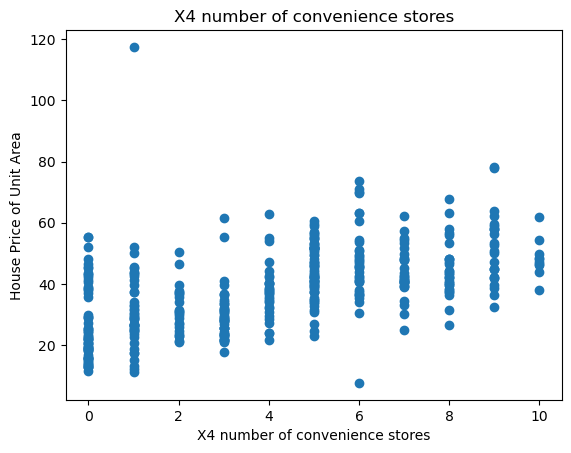

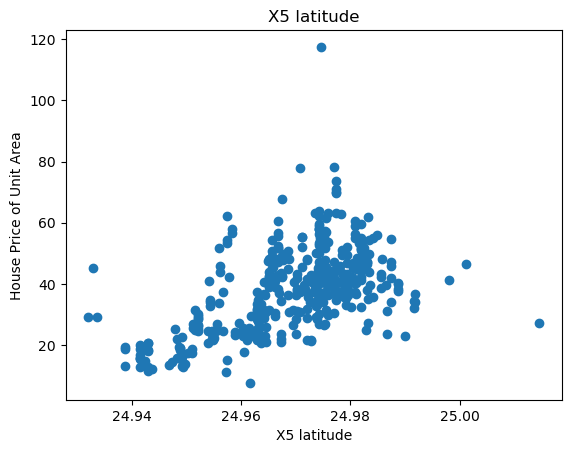

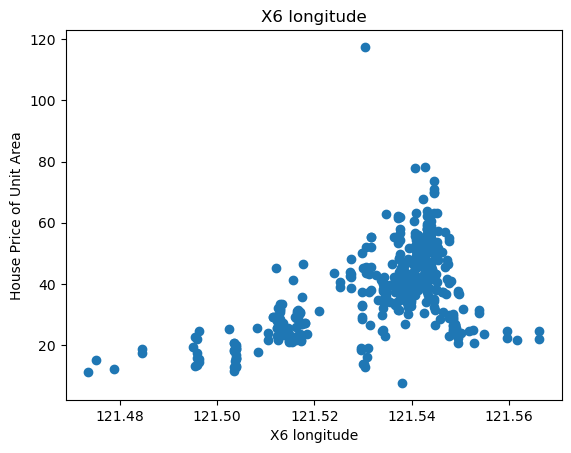

In [113]:
for label in df.columns[:-1]:
    plt.scatter(df[label], df["Y house price of unit area"])
    plt.title(label)
    plt.ylabel("House Price of Unit Area")
    plt.xlabel(label)
    plt.show()

In [114]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [115]:
def get_xy(dataframe, y_label):
    X = dataframe[dataframe.columns[:-1]]
    y = dataframe[y_label].values.reshape(-1, 1)
    return  X, y

In [116]:
X_train, y_train = get_xy(train, "Y house price of unit area")
X_val, y_val= get_xy(val, "Y house price of unit area")
X_test, y_test = get_xy(test, "Y house price of unit area")

## Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
all_reg = LinearRegression()
all_reg.fit(X_train, y_train)

LinearRegression()

In [118]:
all_reg.score(X_test, y_test)

0.5253369700905917

## Neural Network

In [119]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train)

In [120]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [121]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [122]:
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=100
)

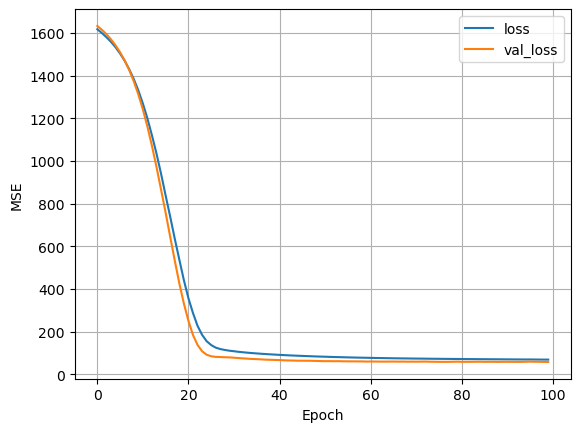

In [123]:
plot_loss(history)

In [124]:
y_pred_lr = all_reg.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

3/3 [==============================] - 0s 10ms/step


In [125]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [126]:
MSE(y_pred_lr, y_test)

63.21392045414662

In [127]:
MSE(y_pred_nn, y_test)

44.45583237223288

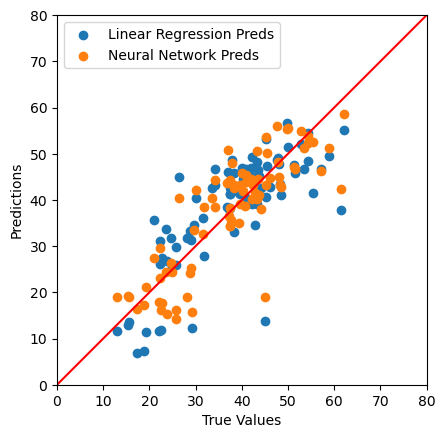

In [128]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test, y_pred_lr, label="Linear Regression Preds")
plt.scatter(y_test, y_pred_nn, label="Neural Network Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")